In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
auto_mpg_data = pd.read_csv('auto_mpg_data_ml.csv')
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,USA,Europe,...,opel,peugeot,plymouth,pontiac,renault,saab,subaru,toyota,triumph,volvo
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevelle malibu,1,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,skylark 320,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,satellite,1,0,...,0,0,1,0,0,0,0,0,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,rebel sst,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,torino,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
features = [column for column in auto_mpg_data.columns if column not in ['mpg', 'car_name', 'company_name']]
X = auto_mpg_data[features]
Y = auto_mpg_data['mpg']

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size = 0.3,random_state=324)

standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

### Machine learning model (Linear regression)

I am going to do the linear regression model or random forest regressor (GBM) because the problem is the regression problem

#### Linear regression

In [5]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

2327410567205.7573

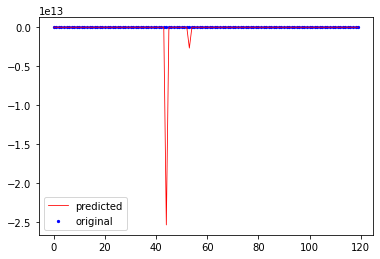

In [6]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_predicted, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### Gradient Boosting Regressor

In [15]:
elbow_plot = {'rmse': [], 'model': [], 'y_predicted': [], 'learning_rate': []}
for estimator in [200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]:
    for rate in [0.1, 0.01, 0.001, 0.0001]:
        gb_regressor = GradientBoostingRegressor(n_estimators=estimator, learning_rate=rate)
        gb_regressor.fit(X_train,y_train)
        y_predicted_gbr = gb_regressor.predict(X_test)
        rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
        elbow_plot['rmse'].append(rmse_bgr)
        elbow_plot['model'].append(gb_regressor)
        elbow_plot['y_predicted'].append(y_predicted_gbr)
        elbow_plot['learning_rate'].append(rate)

trained_models = pd.DataFrame.from_dict(elbow_plot)
trained_models.sort_values('rmse', inplace=True)
trained_models.reset_index(drop=True, inplace=True)

<AxesSubplot:>

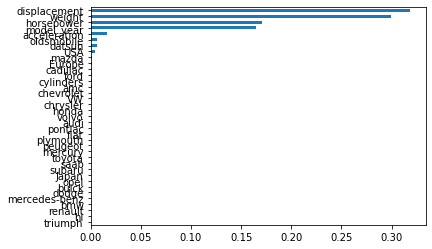

In [19]:
gb_regressor = trained_models.iloc[0]['model']
y_predicted = trained_models.iloc[0]['y_predicted']
learning_rate = trained_models.iloc[0]['learning_rate']
rmse = trained_models.iloc[0]['rmse']

fi= pd.Series(gb_regressor.feature_importances_,index=features)
fi.sort_values(inplace=True)
fi.plot.barh()

<AxesSubplot:>

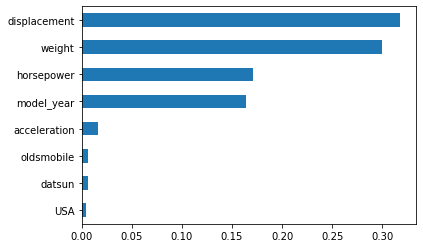

In [28]:
fi[fi > 0.002].plot.barh()

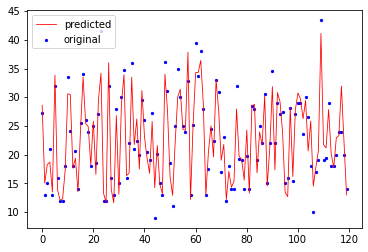

In [21]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_predicted, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

After having tested both algorithms and fine-tuning the hyperparameters, the best algorithm for this prediction is the GradientBoostingRegressor with the following hyperparameters and with the following rmse

In [23]:
print(f'Estimators: {gb_regressor.n_estimators_}')
print(f'Learning rate: {learning_rate}')
print(f'RMSE: {rmse}')

Estimators: 500
Learning rate: 0.1
RMSE: 2.5421115995030403
